# [book](https://nbviewer.org/github/fastai/fastbook/blob/master/16_accel_sgd.ipynb)

In [7]:

from fastai.imports import *
from fastai.vision.all import *

def get_data(url, presize, resize):
    path = untar_data(url)
    return DataBlock(
        blocks=(ImageBlock, CategoryBlock), get_items=get_image_files, 
        splitter=GrandparentSplitter(valid_name='val'),
        get_y=parent_label, item_tfms=Resize(presize),
        batch_tfms=[Normalize.from_stats(*imagenet_stats)],
    ).dataloaders(path, bs=128)

dls = get_data(URLs.IMAGENETTE_160, 160, 128)

def get_learner(**kwargs):
    return vision_learner(dls, resnet34, pretrained=False,
                    metrics=accuracy, **kwargs).to_fp16()

In [8]:
# fastai use an advanced version of the optimizer, let's see what results do we get with it
learn = get_learner()
learn.fit_one_cycle(3, 0.003)

/Users/cactus/miniconda3/lib/python3.12/site-packages/torch/amp/autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
/Users/cactus/miniconda3/lib/python3.12/site-packages/torch/amp/grad_scaler.py:131: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


epoch,train_loss,valid_loss,accuracy,time
0,2.328440,1.885248,0.391083,01:15
1,1.985043,4.883623,0.297834,01:14
2,1.567329,1.298872,0.579873,01:14


SuggestedLRs(valley=0.0063095735386013985)

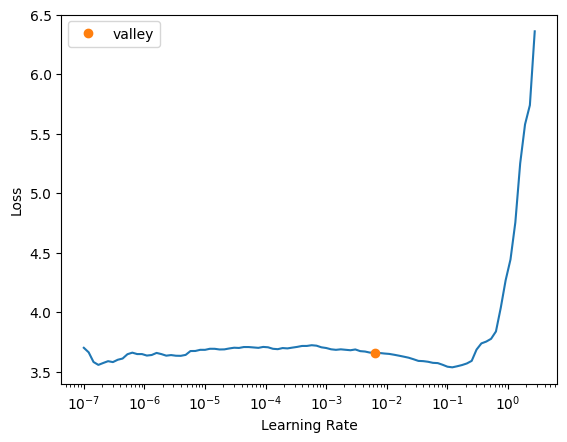

In [9]:
# Now let's take a look at what happens when using a simple SGD optimizer
learn = get_learner(opt_func=SGD)
learn.lr_find()